# SEEPS4ALL noteboook 2
## Verification of deterministic forecasts using climate percentiles
(requires to run notebook_get_forecast_single.ipynb first if you want to assess your own set of forecasts)


Assessing precipitation forecasts against observations using a local climatology for score computation. 

In [1]:
import time
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from utils.utils_data  import get_obs
from utils.utils_data  import get_fct

from utils.utils_data  import get_domain
from utils.utils_stats  import get_weights

from utils.utils_scores import get_CT
from utils.utils_plots  import plot_scores

### 1. Settings

In [3]:
# where the data sit or will sit
path_data     = "/my/data/folder/seeps4all/"

# forecasts
name_forecasts = ["ifs_20240601_to_20240831_00",
                  "aifsv1_20240601_to_20240831_00"]

# colours and names 
colors = ["tab:red","tab:blue"]
labels = ["IFS", "AIFS single v1"]

# ouput path and prefix
prefig = "./prefix"


### 2. Read observations (+ metadata, + climate) and forecasts

In [4]:
# open data
obs_data = get_obs(path_data,"clim")
fct_data = get_fct(path_data,name_forecasts)

open: /ec/res4/scratch/mozb/rodeo/seeps4all//obs_clim_tp24_2022_2024_ecad.zarr
... total number of observation locations: 10705
open: /ec/res4/scratch/mozb/rodeo/seeps4all//ifs_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92
open: /ec/res4/scratch/mozb/rodeo/seeps4all//aifsv1_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92


### 3. Domain and station weighting 

In [5]:
# verification domain
domain = "europe" # default otherwise define
obs_data,fct_data = get_domain(obs_data,fct_data,domain)

focus on domain europe


In [6]:
# weighting: "uniform" or "station_weighting"
weights = get_weights(obs_data,"station_weighting")

weights based on station density


### 4. Compute  threshold dependent scores

Compute PSS, ETS, FBI for a given threshold over a verification period for each forecast lead time

In [7]:
# percentiles used as thresholds
thresholds = ("perc65","perc70","perc75","perc80","perc85","perc90","perc95","perc98","perc99") 
#get contingency tables
CT = get_CT(obs_data,fct_data, weights,thresholds)

experiment 0, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 
experiment 1, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 


In [8]:
# info for plotting
plot_info= dict()
plot_info["thresholds"] = thresholds
plot_info["prefig"] = prefig
plot_info["colors"] = colors
plot_info["labels"] = labels

Plots as a function of the lead time

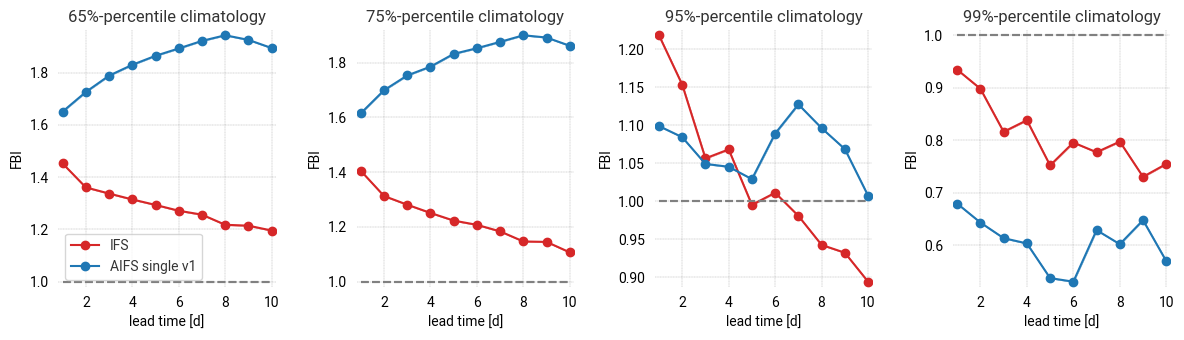

In [9]:
plot_scores(CT,"FBI",plot_info,along="step",x_list=[0,2,6,8],bootstrap=False)

In [ ]:
plot_scores(CT,"ETS",plot_info,along="step",x_list=[2,6,8],bootstrap=True)

In [ ]:
#plot_scores(CT,"ETS difference",plot_info,along="step",x_list=[0,2,6,8])

In [ ]:
#plot_scores(CT,"ETS relative gain",plot_info,along="step",x_list=[0,2,6,8])

In [ ]:
plot_scores(CT,"PSS",plot_info,along="step",x_list=[0,2,6,8])

In [ ]:
#plot_scores(CT,"PSS difference",plot_info,along="step",x_list=[0,2,6,8])

Plots as a function of the threshold

In [ ]:
plot_scores(CT,"FBI",plot_info,along="thresholds",x_list=[0,2,4],bootstrap=False)

In [ ]:
plot_scores(CT,"ETS",plot_info,along="thresholds",x_list=[0,2,3,4],bootstrap=False)

In [ ]:
#plot_scores(CT,"ETS difference",plot_info,along="thresholds",x_list=[0,2,4])

In [ ]:
#plot_scores(CT,"ETS skill",plot_info,along="thresholds",x_list=[0,2,4])

In [ ]:
#plot_scores(CT,"ETS relative gain",plot_info,along="thresholds",x_list=[0,2,4])

In [ ]:
plot_scores(CT,"PSS",plot_info,along="thresholds",x_list=[0,2,4])

In [ ]:
#plot_scores(CT,"PSS difference",plot_info,along="thresholds",x_list=[0,2,4])

In [ ]:
#plot_scores(CT,"PSS relative gain",plot_info,along="thresholds",x_list=[0,2,4])

End of the Notebook